# 2장 연습문제

1-1) 경험분포함수(empirical distribution function)을 그리시오.

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
x = np.array([-2.3, 2.1, 1.3, 1.4, 0.3, -0.5, 3.2, 0.6, 0.9])
x.sort()
y = np.linspace(start=1/len(x), stop=1, num=9)

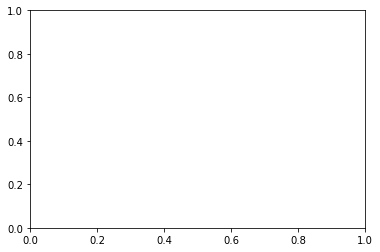

In [23]:
fig1, ax = plt.subplots(1,1)

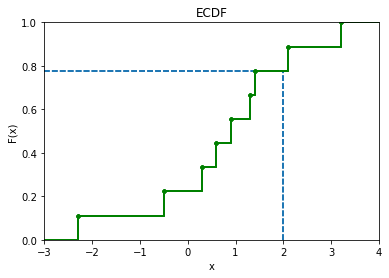

In [33]:
ax.step(x,y,'.-g',where='post')
ax.hlines(0,-3,x.min(),'g')
ax.hlines(1,x.max(),4,'g')
ax.vlines(x.min(),0,y.min(),'g')
ax.set_title('ECDF')
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
display(fig1)

1-2) $Pr(X\le2)$를 추정하시오

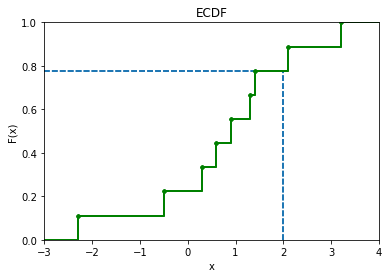

In [31]:
ax.hlines(7/9, -3, 2, ls='dashed')
ax.vlines(2, 0, 7/9, ls='dashed')
ax.autoscale(axis='both',tight=True)
fig1

$\hat{Pr(X\le2)}=\frac{7}{9}$

1-3) $H_0: Pr(X\le2)=0.5$를 검정하시오.

$Pr(X\le2)=E[I(X\le2)]$이므로 $Y=I(X\le2)$로 정의하면 Y는 0과 1을 값으로 취하고 1이 나올 확률이 $E[I(X\le2)]=p$인 베르누이 분포를 갖는다. 따라서 $Pr(X\le2)=0.5$를 검정하는 것은 베르누이분포의 모수인 $p$가 0.5인지 검정하는 것과 동일하다. 이에 따라서 검정을 시행한 결과는 아래와 같다.

$H_0: p=0.5$ vs $H_1: p\neq0.5$<br>
새로 정의한 Y는 아래와 같다.

In [137]:
y_new = x<=2
print(y_new.astype(int)) # Y

[1 1 1 1 1 1 1 0 0]


검정통계량 $\sum{Y_i}\sim^{under H_0}Bin(9,0.5)$ 

$\sum{Y_i}=7$이므로 p-value는:

In [182]:
from scipy.stats import binom
p = 2*binom.sf(7,9,0.5)
print(p.round(3))

0.039


p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 따라서 $p\neq0.5$

2-1) 경험분포함수를 구하고 그리고 경험분포함수의 단점에 대해 쓰시오.

In [160]:
x=np.array([4.12,-0.68,0.19,1.11,0.37,1.16,-3.65,0.03,0.81,0.03])
x.sort()
y=np.linspace(start=1/len(x),stop=1,num=len(x))

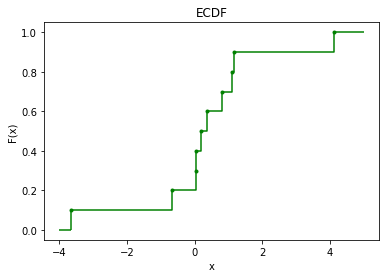

In [162]:
plt.step(x,y,'.-g',where='post')
plt.hlines(0,math.floor(x.min()),x.min(),'g')
plt.hlines(1,x.max(),math.ceil(x.max()),'g')
plt.vlines(x.min(),0,y.min(),'g')
plt.title('ECDF')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

경험분포함수의 단점은 아래와 같다.
1. 표본의 수가 작을 경우, tail부분에 대한 확률이 정확하지 않다.
2. 원래의 cdf는 연속형이지만 경험분포함수는 이산형이다.
3. 경험분포함수의 미분이 잘 정의되지 않는다.

2-2) $F(0)$을 추정하고 추정치의 표준오차를 구하여 $H_0: F(0)=0.5$를 검정하시오.

새로운 변수 $Y$를 $I(X\le0)$으로 정의하자. $Y$는 다음과 같다.

In [164]:
y_new = x <= 0
print(y_new.astype(int))

[1 1 0 0 0 0 0 0 0 0]


$F(0)=E(I(X\le0)]=E(Y)$이므로 $F(0)$의 추정량은 $\bar{Y}$이다. 따라서 $\hat{F(0)}=\bar{Y}=0.2$로 구할 수 있으며, 표준오차는 $\sqrt{V(\bar{Y})}=\sqrt{\frac{p(1-p)}{n}}\approx\sqrt{\frac{\bar{Y}(1-\bar{Y})}{n}}\approx0.126$

$H_0:F(0)=0.5$ vs $H_1:F(0)\ne0.5$<br>
귀무가설이 참일 때, 검정통계량 $\sum{Y_i}\sim Bin(10,0.5)$<br>
$\sum{Y_i}=2$이므로 p-value는:

In [181]:
from scipy.stats import binom
p = 2*binom.cdf(2,10,0.5)
print(p.round(3))

0.109


p-value가 유의수준 0.05보다 크므로 귀무가설을 기각하지 못한다. 따라서 $p=0.5$

2-4) $V(exp(X))$를 대략적으로 추정하고 3)에서의 결과와 비교하시오. 무엇이 잘못인가?

In [180]:
var = np.exp(x).var()
print(var.round(3))

325.318


n이 커져도 $X$는 $\mu$로 근사가 되지 않기 때문에 $\mu$에 대한 테일러 정리를 통해 $exp(X)$를 근사시키는 방법은 옳지 않다.

2-5) $V(exp(\bar{X}))$를 붓스트랩을 이용하여 추정하기 위한 코드를 쓰시오.

In [187]:
B = 10000
result = []
for i in range(B):
    temp = np.random.choice(x,len(x)) # with replacement
    result.append(np.exp(temp.mean())) 
result = np.array(result)
var = result.var()
print(var.round(3))

1.097
